In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings

In [2]:
ahmedabad = pd.read_excel('C:/Users/ANSUMAN/Documents/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/Sitewise_original_data/ahmedabad.xlsx')    # reads the ahmedabad file
ahmedabad.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-05-31,85.21,373.64,40.04,17.82,49.75,0.74,55.85,36.34,66.733333,Satisfactory
1,2019-06-01,113.26,327.48,48.27,24.69,55.46,1.01,61.73,34.67,80.450000,Satisfactory
2,2019-06-02,75.20,210.97,43.99,28.52,36.04,0.76,63.51,35.45,73.316667,Satisfactory
3,2019-06-03,62.92,319.75,39.27,23.23,40.98,0.61,60.27,34.11,65.450000,Satisfactory
4,2019-06-04,54.68,168.39,30.02,17.66,37.17,0.59,72.36,34.34,50.033333,Satisfactory


In [3]:
ahmedabad['Date'] = pd.to_datetime(ahmedabad['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
ahmedabad["month"] = ahmedabad["Date"].dt.month
ahmedabad["week"] = ahmedabad["Date"].dt.strftime('%V').astype('int64')
ahmedabad["week_day"] = ahmedabad["Date"].dt.weekday
ahmedabad.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-05-31,85.21,373.64,40.04,17.82,49.75,0.74,55.85,36.34,66.733333,Satisfactory,5,22,4
1,2019-06-01,113.26,327.48,48.27,24.69,55.46,1.01,61.73,34.67,80.450000,Satisfactory,6,22,5
2,2019-06-02,75.20,210.97,43.99,28.52,36.04,0.76,63.51,35.45,73.316667,Satisfactory,6,22,6
3,2019-06-03,62.92,319.75,39.27,23.23,40.98,0.61,60.27,34.11,65.450000,Satisfactory,6,23,0
4,2019-06-04,54.68,168.39,30.02,17.66,37.17,0.59,72.36,34.34,50.033333,Satisfactory,6,23,1


In [4]:
ahmedabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1637 non-null   datetime64[ns]
 1   PM2.5         1637 non-null   float64       
 2   PM10          1637 non-null   float64       
 3   NO2           1637 non-null   float64       
 4   NH3           1637 non-null   float64       
 5   SO2           1637 non-null   float64       
 6   CO            1637 non-null   float64       
 7   Ozone         1637 non-null   float64       
 8   AT            1637 non-null   float64       
 9   AQI           1637 non-null   float64       
 10  AQI_Standard  1637 non-null   object        
 11  month         1637 non-null   int32         
 12  week          1637 non-null   int64         
 13  week_day      1637 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1), object(1)
memory usage: 166.4+ KB


## Support Vector Regression

In [5]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [6]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = ahmedabad["month"]
data_pm25["week"] = ahmedabad["week"]
data_pm25["week_day"] = ahmedabad["week_day"]
data_pm25["PM2.5"] = ahmedabad["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,5,22,4,85.21
1,6,22,5,113.26
2,6,22,6,75.20
3,6,23,0,62.92
4,6,23,1,54.68


In [7]:
# shuffling the data set
data_pm25 = shuffle(data_pm25, random_state=1).reset_index(drop=True)
data_pm25.head()

,month,week,week_day,PM2.5
0,10,41,4,144.71
1,11,45,2,206.51
2,9,38,3,17.68
3,7,28,4,28.85
4,7,30,2,27.55


In [8]:
duplicate_pm25 = data_pm25.copy()

In [9]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [10]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [12]:
ahmedabad_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [13]:
predictions_pm25 = ahmedabad_pm25_svr.predict(X_test)

In [14]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.6940853202612383


In [15]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(y_test.shape[0],1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.083509
dtype: float64

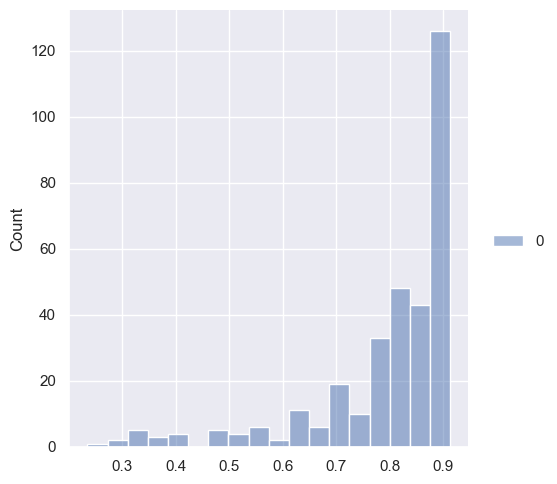

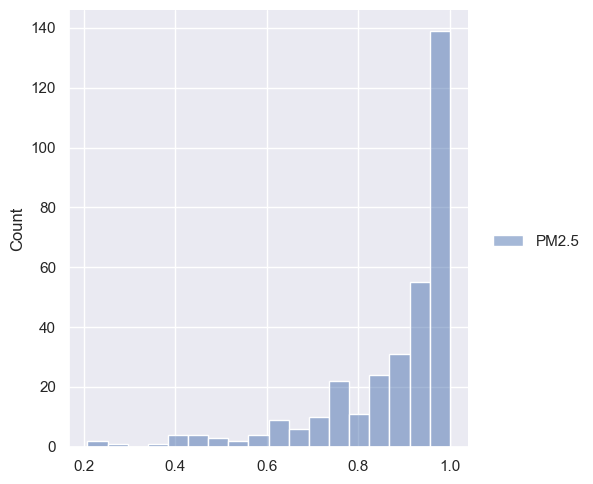

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

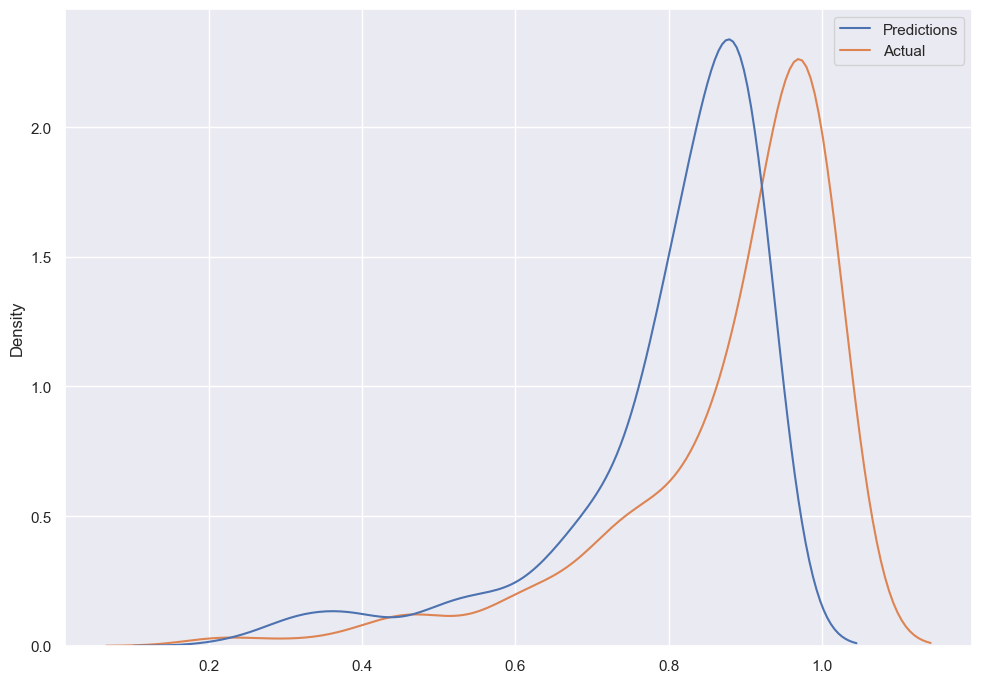

In [17]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [18]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = ahmedabad["month"]
data_pm10["week"] = ahmedabad["week"]
data_pm10["week_day"] = ahmedabad["week_day"]
data_pm10["PM10"] = ahmedabad["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,5,22,4,373.64
1,6,22,5,327.48
2,6,22,6,210.97
3,6,23,0,319.75
4,6,23,1,168.39


In [19]:
# shuffling the data set
data_pm10 = shuffle(data_pm10, random_state=1).reset_index(drop=True)
data_pm10.head()

,month,week,week_day,PM10
0,10,41,4,333.38
1,11,45,2,378.88
2,9,38,3,41.04
3,7,28,4,66.77
4,7,30,2,39.90


In [20]:
duplicate_pm10 = data_pm10.copy()

In [21]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [22]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

In [24]:
ahmedabad_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [25]:
predictions_pm10 = ahmedabad_pm10_model_svr.predict(X_test)

In [26]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is -0.37240488573844077


In [27]:
predictions_pm10.shape

(328,)

In [28]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(y_test.shape[0],1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.09087
dtype: float64

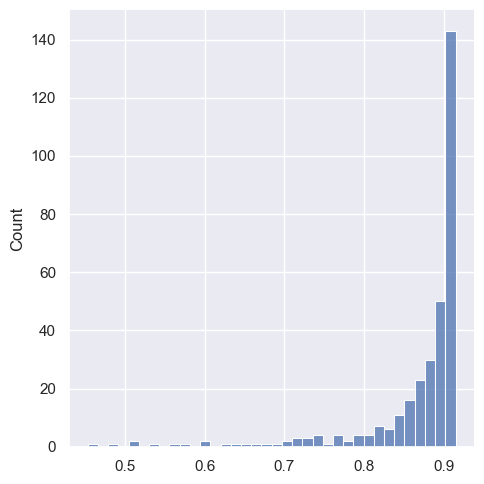

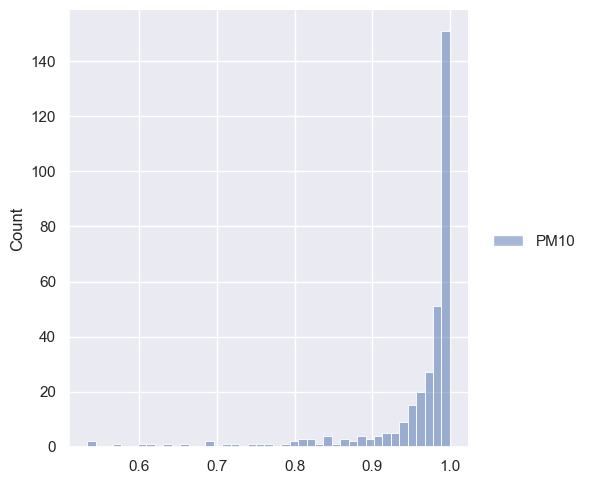

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

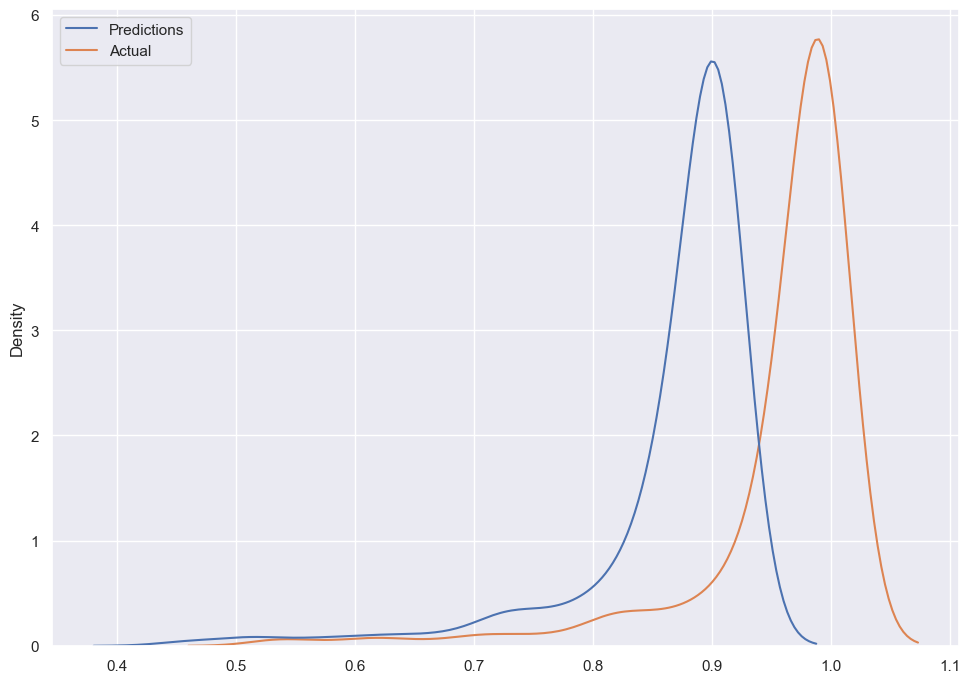

In [30]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [31]:
data_no2 = pd.DataFrame()
data_no2["month"] = ahmedabad["month"]
data_no2["week"] = ahmedabad["week"]
data_no2["week_day"] = ahmedabad["week_day"]
data_no2["NO2"] = ahmedabad["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,5,22,4,40.04
1,6,22,5,48.27
2,6,22,6,43.99
3,6,23,0,39.27
4,6,23,1,30.02


In [32]:
# shuffling the data set
data_no2=shuffle(data_no2, random_state=1).reset_index(drop=True)
data_no2.head()

,month,week,week_day,NO2
0,10,41,4,37.64
1,11,45,2,62.86
2,9,38,3,20.79
3,7,28,4,8.75
4,7,30,2,8.39


In [33]:
duplicate_no2 = data_no2.copy()

In [34]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [35]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

In [37]:
ahmedabad_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [38]:
predictions_no2 = ahmedabad_no2_svr.predict(X_test)

In [39]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9336502180233958


In [40]:
predictions_no2.shape

(328,)

In [41]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.060743
dtype: float64

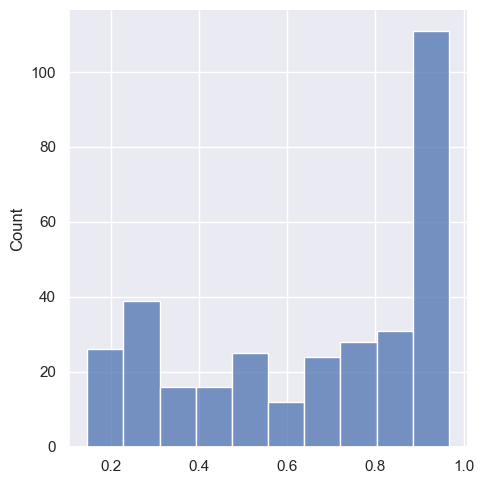

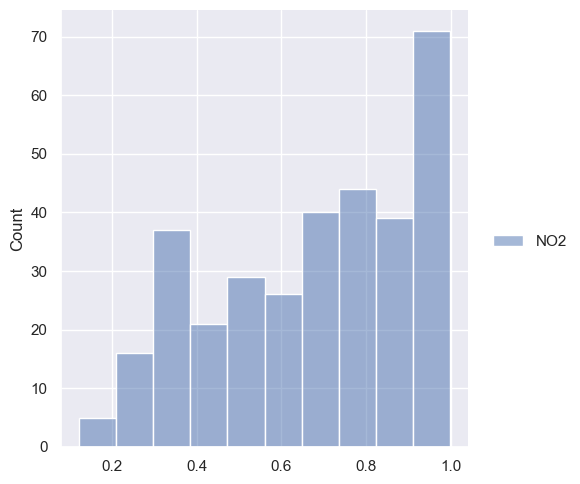

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

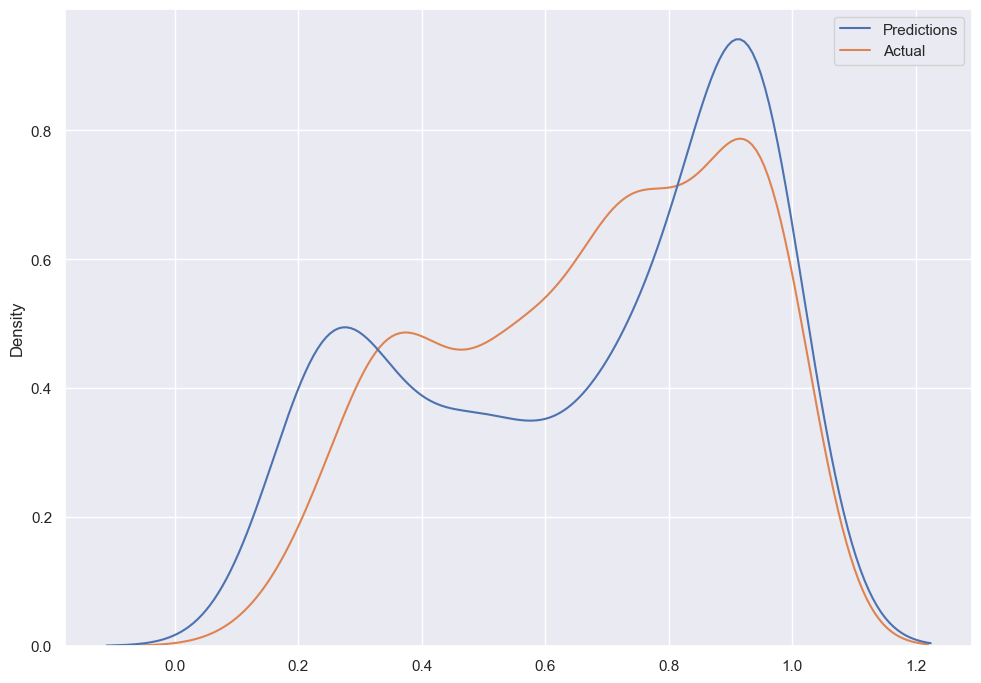

In [43]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [44]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = ahmedabad["month"]
data_nh3["week"] = ahmedabad["week"]
data_nh3["week_day"] = ahmedabad["week_day"]
data_nh3["NH3"] = ahmedabad["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,5,22,4,17.82
1,6,22,5,24.69
2,6,22,6,28.52
3,6,23,0,23.23
4,6,23,1,17.66


In [45]:
# shuffling the data set
data_nh3 = shuffle(data_nh3, random_state=1).reset_index(drop=True)
data_nh3.head()

,month,week,week_day,NH3
0,10,41,4,30.55
1,11,45,2,43.42
2,9,38,3,16.68
3,7,28,4,27.46
4,7,30,2,27.69


In [46]:
duplicate_nh3 = data_nh3.copy()

In [47]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [48]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_nh3, y_nh3, test_size=0.2, random_state=42)

In [50]:
ahmedabad_nh3_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [51]:
predictions_nh3 = ahmedabad_nh3_svr.predict(X_test)

In [52]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9284848292656094


In [53]:
predictions_nh3.shape

(328,)

In [54]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.064853
dtype: float64

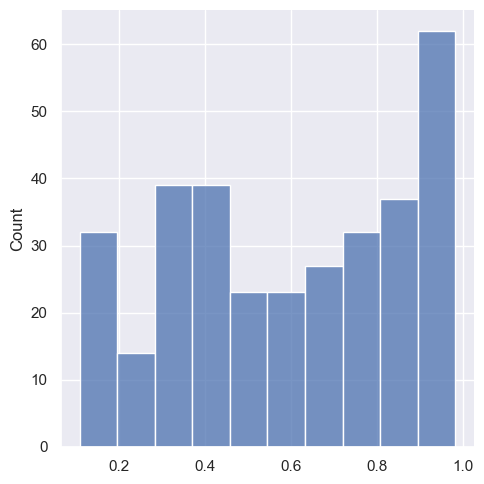

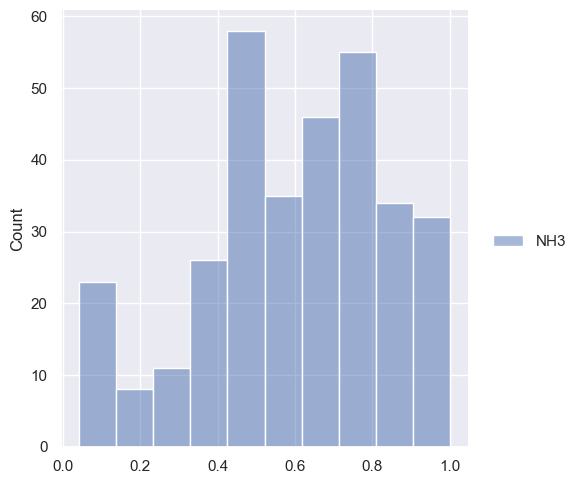

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

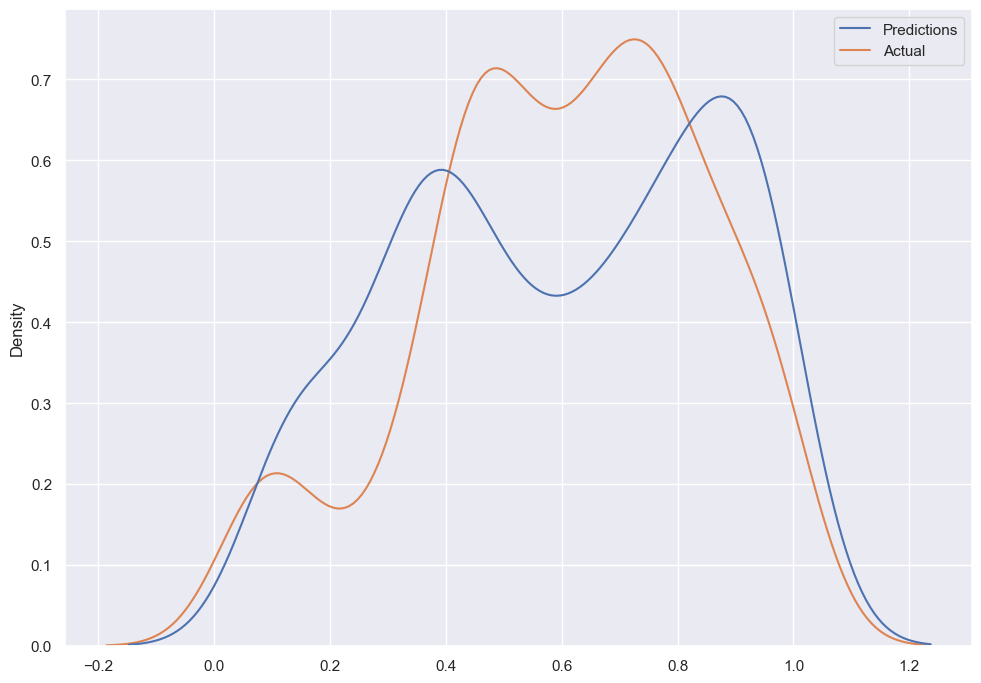

In [56]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [57]:
data_so2 = pd.DataFrame()
data_so2["month"] = ahmedabad["month"]
data_so2["week"] = ahmedabad["week"]
data_so2["week_day"] = ahmedabad["week_day"]
data_so2["SO2"] = ahmedabad["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,5,22,4,49.75
1,6,22,5,55.46
2,6,22,6,36.04
3,6,23,0,40.98
4,6,23,1,37.17


In [58]:
# shuffling the data set
data_so2 = shuffle(data_so2, random_state=1).reset_index(drop=True)
data_so2.head()

,month,week,week_day,SO2
0,10,41,4,9.47
1,11,45,2,14.02
2,9,38,3,13.70
3,7,28,4,7.55
4,7,30,2,7.91


In [59]:
duplicate_so2 = data_so2.copy()

In [60]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [61]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)

In [63]:
ahmedabad_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [64]:
predictions_so2 = ahmedabad_so2_svr.predict(X_test)

In [65]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9651513685513412


In [66]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.051893
dtype: float64

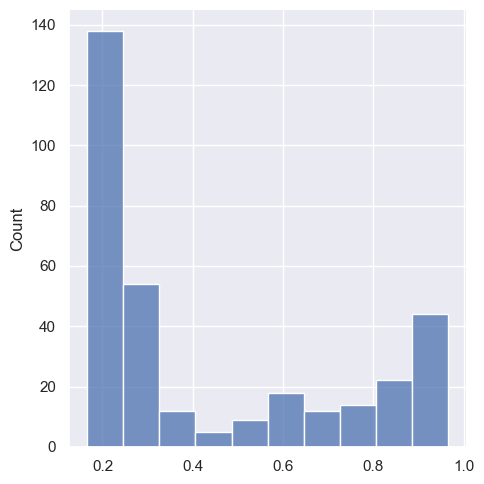

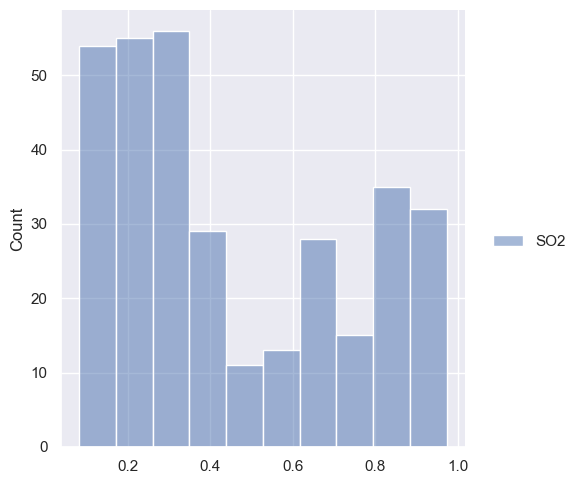

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

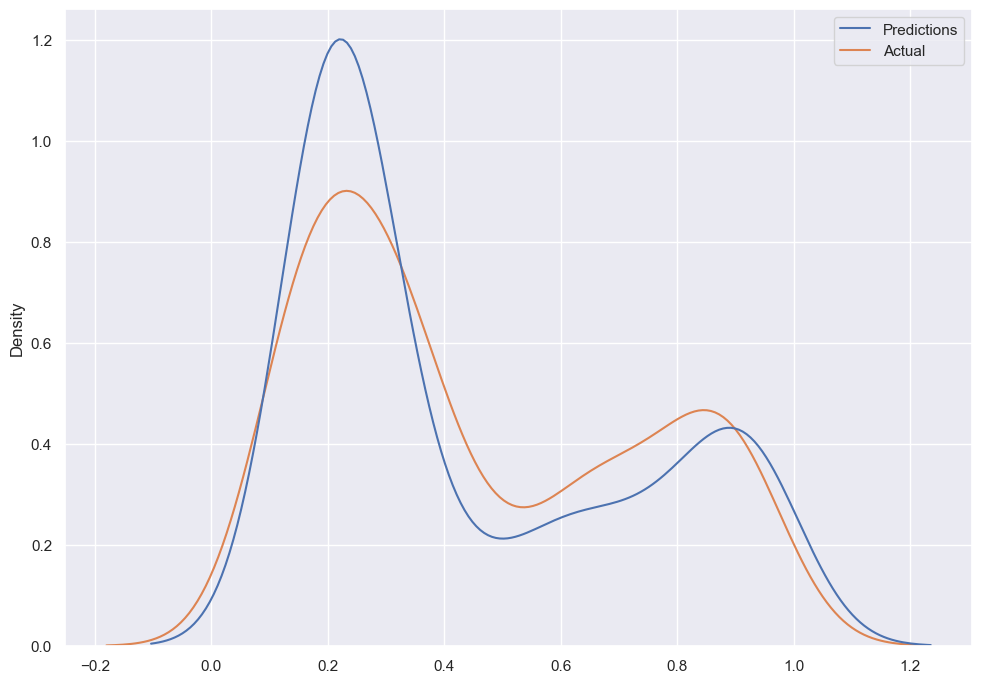

In [68]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [69]:
data_co = pd.DataFrame()
data_co["month"] = ahmedabad["month"]
data_co["week"] = ahmedabad["week"]
data_co["week_day"] = ahmedabad["week_day"]
data_co["CO"] = ahmedabad["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,5,22,4,0.74
1,6,22,5,1.01
2,6,22,6,0.76
3,6,23,0,0.61
4,6,23,1,0.59


In [70]:
# shuffling the data set
data_co = shuffle(data_co, random_state=1).reset_index(drop=True)
data_co.head()

,month,week,week_day,CO
0,10,41,4,1.71
1,11,45,2,1.73
2,9,38,3,0.50
3,7,28,4,0.32
4,7,30,2,1.51


In [71]:
duplicate_co = data_co.copy()

In [72]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)''' 
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [73]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

In [75]:
ahmedabad_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [76]:
predictions_co = ahmedabad_co_svr.predict(X_test)

In [77]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.05640145959277654


In [78]:
predictions_so2.shape

(328,)

In [79]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.789236
dtype: float64

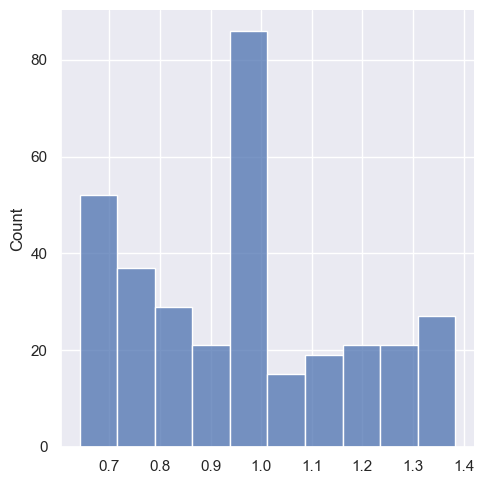

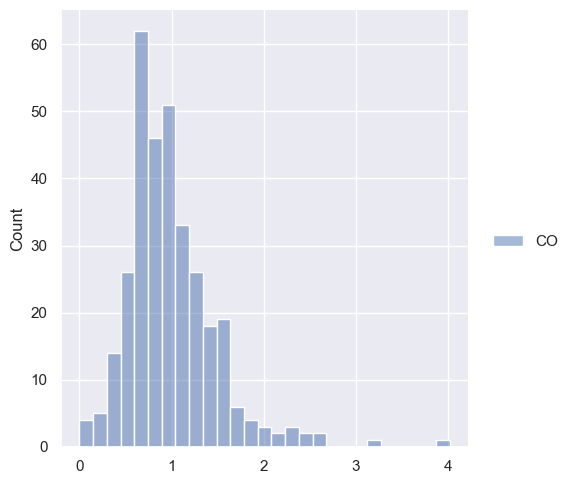

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

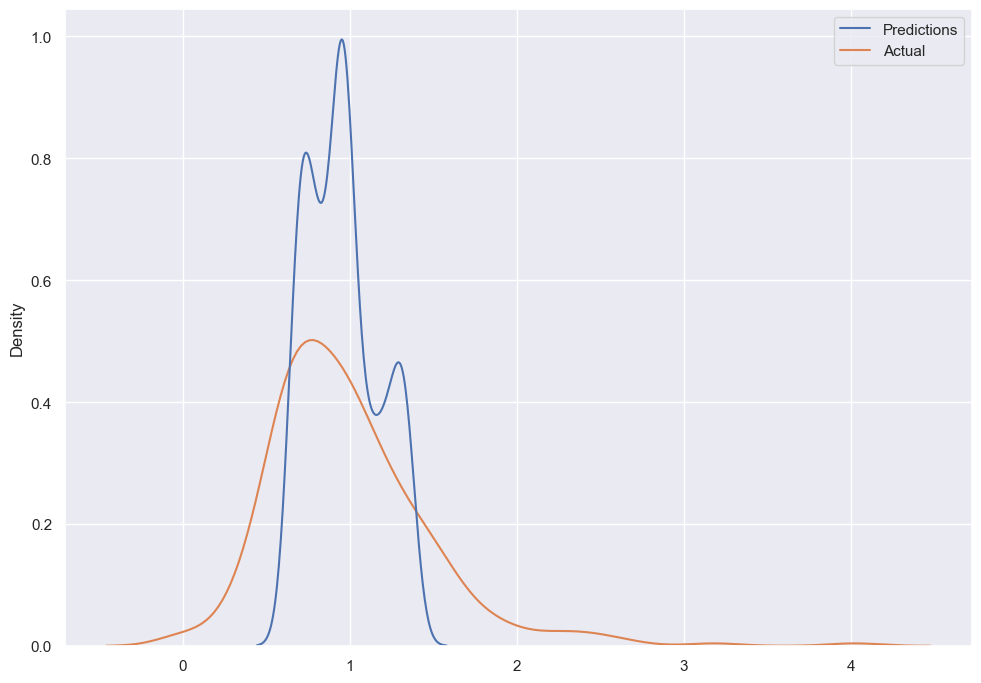

In [81]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [82]:
data_ozone = pd.DataFrame()
data_ozone["month"] = ahmedabad["month"]
data_ozone["week"] = ahmedabad["week"]
data_ozone["week_day"] = ahmedabad["week_day"]
data_ozone["Ozone"] = ahmedabad["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,5,22,4,55.85
1,6,22,5,61.73
2,6,22,6,63.51
3,6,23,0,60.27
4,6,23,1,72.36


In [83]:
# shuffling the data set
data_ozone = shuffle(data_ozone, random_state=1).reset_index(drop=True)
data_ozone.head()

,month,week,week_day,Ozone
0,10,41,4,47.61
1,11,45,2,44.73
2,9,38,3,29.85
3,7,28,4,8.73
4,7,30,2,12.17


In [84]:
duplicate_ozone = data_ozone.copy()

In [85]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [86]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

In [88]:
ahmedabad_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [89]:
predictions_ozone = ahmedabad_ozone_svr.predict(X_test)

In [90]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9513261448506668


In [91]:
predictions_ozone.shape

(328,)

In [92]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.064644
dtype: float64

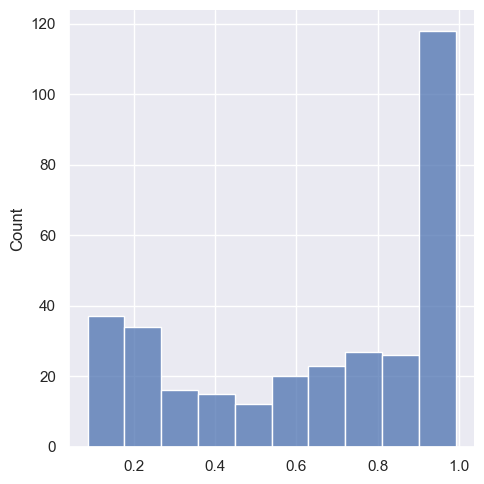

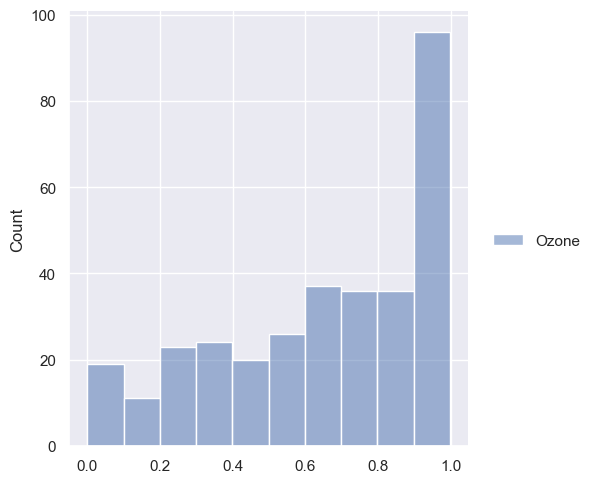

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

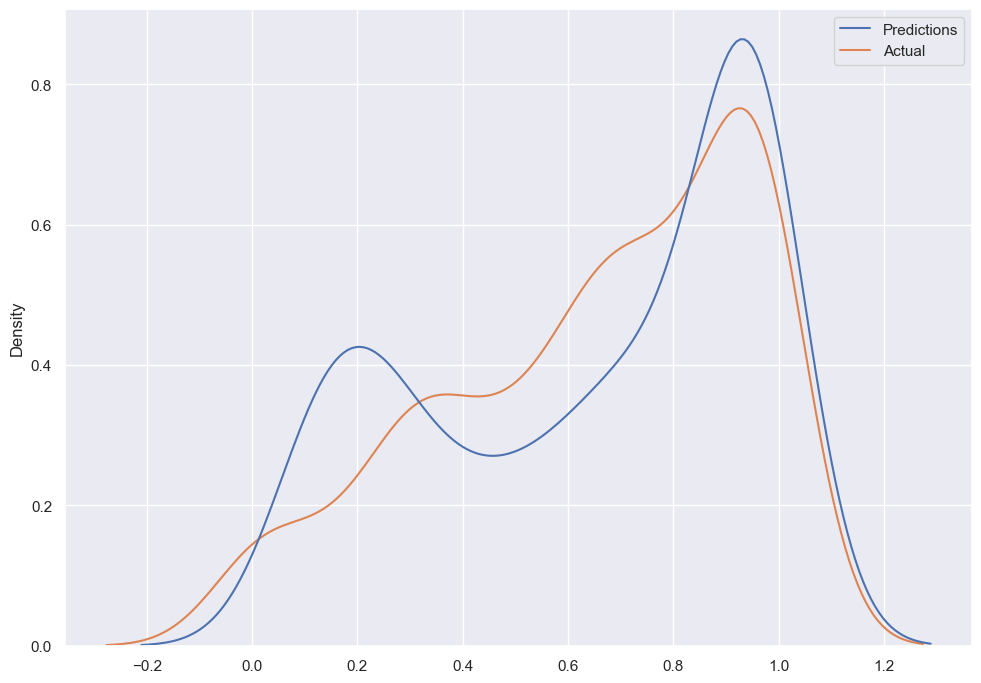

In [94]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [95]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [96]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [97]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [98]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [99]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],ahmedabad_pm25_svr,ahmedabad_pm10_model_svr,ahmedabad_no2_svr,ahmedabad_nh3_svr,ahmedabad_so2_svr,ahmedabad_co_svr,ahmedabad_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [33.98459074]
PM 10: [71.51594841]
NO2: [25.60278784]
NH3: [18.42700715]
SO2: [7.44194577]
CO: [0.29571436]
O3: [18.61512409]

The AQI value is expected to be around 71.52 and the index is expected to be Satisfactory


C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_30176\3519167531.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_30176\3519167531.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_30176\3519167531.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_30176\3519167531.py:69: DeprecationWa